<h1><center>Abhishek Thakur Book Concept<center></h2>

### Chapter - Feature Selection

* Topic Covered:
    * VarianceThreshold method
    * Correlation method
    * Univariate feature selection(smart way)
    * Greedy Method
        * Exact greedy
        * RFE 
        * forward feature selection
    * Model Based Selection
        * Using our own method
        * Using Scikit learn SelectFromModel
        * Using scikit-learn pipeline method

Feature selction is **"the"** most critical step in Feature Engineering Task. We have to be very careful when we select feature using techniques.

**Why we need:**
    
   Let say we have thousands of feature most of them may useless for our model. So for better model preparation we have to select some of them and vice versa remove most of them. One more issue that may occur i.e well know problem `Curse of dimensionality` which is nothing but when we have lot of features, we must also have a lot of training samples to captures all features, and it also takes lot of training time (even some distance metric like Euclidean wouldn't give the actual distance in high dim space.This is also be one of reason why we do feature selection.
   2nd Reason we just want those which are useful or add some value to the target or my object.
   
* Now discuss what are the various way to do it.

**Method - 1:Constant Feature Removing**
   - Simplest Approach:
        Very first step remove features which have ***`very low variance`***(these feature are constant features that doesn't add anything to model and unneccesarily increase the model training complexity)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#scikit-learn provide VarianceThreshold that does this job precisely
features = {
    
    'ID': np.random.randint(1000, 10010, 22),
    'Sales_price': np.random.randint(10000, 40000, 22),
    'N_Item': np.random.randint(10,11,22)
}

#craete small fake dataframe for demonstration purpose

df = pd.DataFrame(features)

#removing features which have variance less than 0.2 .
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold = 0.2)

#remove features whose variance close to 0.(constant features)

transformed_data = var_thresh.fit_transform(df)

df2 = pd.DataFrame(transformed_data,
             columns = [ f"feature_{i}" for i in range(1, transformed_data.shape[1]+1) ]
)
df2.head(6)

,feature_1,feature_2
0,6152,22260
1,8779,21060
2,3040,23961
3,6405,24901
4,6624,23473
5,7644,25467


Feature_3 has been removed which have variance less than 0.2

**Method - 2:(Using Pearson Correlation)**
   - Approach:
   
        Features which have ***`very high correlation`***, remove them. Let say we've two features in Dataset which are highly correlated then remove one of them and retain only one for modelling. 

In [3]:
from sklearn.datasets import fetch_california_housing

#fetching a dataset which gives us dictionary 
#consist the information about data
data = fetch_california_housing()

X = data["data"]
col_names = data["feature_names"]
y = data['target']

#convert it into pandas dataframe

df = pd.DataFrame(X, columns = col_names)
df.head()

#creating a highly correlated feature

df.loc[: , 'MedIncsqrt'] = df.MedInc.apply(lambda m : np.sqrt(m))
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedIncsqrt
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2.885342
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2.881215
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,2.693956
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,2.375521
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.961173


In [4]:
#get correlation metrics(pearson)

df.corr(method ="pearson")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedIncsqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedIncsqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


Here MedInc and MedIncsqrt are highly correlated with pearson score 0.98 approx. So we have to remove one of the feature from df.

NOTE: **`Correlation and Causation are different`** i.e. if two features are correlated it is not meaning that one causes the other for that purpose we've to look at the **causion Models** which is separate statistical analysis than correlation Model. 

**Method - 3:(Univariate Feature Selection)**
   - Approach:
   
       Try to get the score of each feature against a target. Most popular methods are as follows :-
        * chi^2
        * Anova
        * F-test
        * Mutual Information
        
    There are two ways of using this in scikit-learn that is below:-
       * SelectKBest: Select Top k features.
       * SeletPercentile: Slect top features based on percentage.
 
* NOTE:
     * if we know assumption of Anova/Chi2/etc that is okay then we know where to apply otherwise using SelectKBest/SelectPercentile carelessly might throw out many features for the wrong reasons.

In [5]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

In [6]:
#custom wrapper to perform univariate feature selection 
#for "almost" any new problem

class UnivariateFeatureSelection:
    
    def __init__(self, problem_type, n_feature, scoring):
        
        #for classification
        if problem_type == 'classification':
            valid_scoring = {
                "f_classif" : f_classif,
                "chi2" : chi2,
                "mutual_info_classif" : mutual_info_classif
            }
       #for regression
        else:
            valid_scoring = {
                "f_regression" : f_regression,
                "mutual_info_regression" : mutual_info_regression
            }
        if scoring not in valid_scoring:
            raise Exception("Invalid Scoring Method")
        
        #if i want exact number of feature like 5,6 features  
        if isinstance(n_feature, int):
            self.selection = SelectKBest(valid_scoring[scoring],
                                k = n_feature
                    )
            
        #if i want as percentage of feature 
        elif isinstance(n_feature, float):
            self.selection = SelectPercentile(
                        valid_scoring[scoring],
                        percentile = n_feature * 100
            )
        else:
            raise Exception("invalid type of feature")
    
    #fitting my data 
    def fit(self, X, y):
        return self.selection.fit(X, y)
    
    #transforming my data 
    def transform(self):
        return self.selection.transform(X)
    
    #fit_transform in single line 
    def fit_transform(self):
        return self.selection.fit_transform(X, y)
    
#how to use this wrapper effectively
#Code -> 

"""ufs = UnivariateFeatureSelection(problem_type = 'regression', 
        n_feature = 0.1,
        scoring = f_regresion
)

ufs.fit(X,y)
X_transformed = ufs.transform(X)"""

"ufs = UnivariateFeatureSelection(problem_type = 'regression', \n        n_feature = 0.1,\n        scoring = f_regresion\n)\n\nufs.fit(X,y)\nX_transformed = ufs.transform(X)\n\n"

* NOTE:
    * ***Chi2*** test suitable for only non-negative dataset.
    * This technique pretty much good when we build NLP model besded on TF-IDF/BOW model.
    * When use this feature selection method it is better to t start with less features to create rather than 100 of features in very first place.
    * However this is not a best approach but on some extent it works well for some poblems.

**Method - 4:(Greedy feature Selection)**
   - Approach:
   
       Since univariate feature selection may or may not work well. That's is why people refer **model based feature selection Approach**.
       Steps in Greedy:
           i) Choose the model first.
           ii)Select the loss/scoring function.
           iii) Iterative approach evaluate each feature and add it to the list of "good" feature iff it imporoves the previous score/loss.
           
* NOTE: 
    only disadvantages is that we need to fit the model each time when we evaluate feature. So time complexity get increased. 
    Moreover there is a high chance of overfitting if this feature selection method we did not use properly.(Why?)
    And Also this is not exact forward feature selection because complexity of forward feature selection may be high but greedy doing job smartly.

In [8]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.datasets import make_classification

In [11]:
#custom wrapper for greedy feature selection
#for almost any problem
class GreedyFeatureSelection:
    
    #calculate AUC_score using linear model(we can select any model) 
    def evaluate_score(self, X, y):
        model = linear_model.LogisticRegression()
        model.fit(X, y)
        predictions = model.predict_proba(X)[:, 1]
        auc_scores = metrics.roc_auc_score(y, predictions)
        return auc_scores
        
    #actual method for feature selection
    def feature_selection(self, X, y):
        
        #good features and best scores list
        good_features = []
        best_scores = []
        
        #number of features in dataset
        n_features = X.shape[1]
        
        
        #infinite iterative loop 
        while True:
            
            #for every roud current feature as None and best_score as 0.
            current_feature = None 
            best_score = 0
            
            #iterative approach for selcting single feature
            for feature in range(n_features):
                
                #if feature aleady in good_feature list skip that one
                if feature in good_features:
                    continue
                 
                #create list that includes all features which are already good + current one
                select_features = good_features + [feature]
                
                #prepare data
                X_train = X[ : , select_features]
                
                #get auc_roc score
                score = self.evaluate_score(X_train, y)

                if score > best_score:
                    best_score = score
                    current_feature = feature
                    
          # add it to good feature list
            if current_feature != None:
                good_features.append(feature)
                best_scores.append(best_score)
                
          # if in previous round my score wouldn't incearse than exit while loop  
            if len(best_scores) > 2:
                if best_scores[-2] > best_scores[-1]:
                    break
                
         
        #why removing last feature ? becoz previous score doesn't improove
        return best_scores[:-1], good_features[:-1]
            
    
    #call function call the class on these parameter
    def __call__(self, X, y):
        scores, features = self.feature_selection(X, y)
        return X[:, features], scores

In [12]:
#demo check for above 
if __name__ =="__main__":
    #Generate a random n-class classification problem.
    X, y = make_classification(n_samples = 1000,
                        n_features = 100,
                        n_classes = 2)
    X_transformed, scores = GreedyFeatureSelection()(X,y)
    print(X.shape)
    print(X_transformed.shape)

(1000, 100)
(1000, 2)


**Method - 4:(Another Greedy mmethod - Recursive Feature Elimination(RFE))**
   - Approach:
       instead of selecting features one by one, we are removing features one by one.
       - we start with all features and remove one feature in every iteration that provide the least score/loss to the model.
     Challange is, how to know which feature will give us least score ?
           - in case of linear SVM or logistic regression using the coefficient which is close to 0 are less imporatnat and in tree based approach by knowing the feature importance.
           
           
* NOTE: 
   * Coefficient is more +ve which important for +ve class and Coefficient which are more -ve important for -ve class. 
   * we have the ability to select the n_features that we want.

In [13]:
#get data for demonstration purpose 
from sklearn.datasets import fetch_california_housing

#fetch_california_housing 
data = fetch_california_housing()
X = data['data']
col_names = data['feature_names']
y = data['target']
print(X.shape)

(20640, 8)


In [14]:
#No need to create the Wrapper, scikit-learn already has implementation for RFE.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#initialize the model
LR_model = LinearRegression()

#initialize RFE for above model with required number of feature(Top feature that we want to retain)

rfe = RFE(estimator = LR_model,
    n_features_to_select = 3
)

#fit RFE
rfe.fit(X, y)

#Getting the transfomed data with selected columns
X_transformed = rfe.transform(X)

#we can also use rfe.fit_transform(X, y) directly
print(X_transformed)

[[   8.3252   37.88   -122.23  ]
 [   8.3014   37.86   -122.22  ]
 [   7.2574   37.85   -122.24  ]
 ...
 [   1.7      39.43   -121.22  ]
 [   1.8672   39.43   -121.32  ]
 [   2.3886   39.37   -121.24  ]]


* The above two approach are greedy method RFE, and greedy feature selection 

**Method - 5:(Model Based Selection)**
   - Approach:
       Selecting features based on ***Coefficients/importance of features(Tree based).***
       
       Procedure - we need to select the threshold, coeff > threshold then we keep the feature otherwise remove.
   - 2nd approach can be using the model which support **L1 Norm(L1 regularizer(Lasso Penalization))** which create the sparsity i.e makes the most of the coefficient zero which are less important. And we select only feature with non-zero coefficient.  
   
**NOTE:**
     * So in short we can get important features based on one model and then train another model based on features we had got from previous model. 

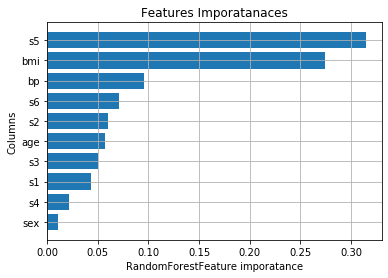

In [15]:
#get all dependencies
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

#load diabetes data for demonstration purpose
data = load_diabetes()
X = data['data']
y = data['target']
colm_names = data['feature_names']

#initialize the model
RF_model = RandomForestRegressor()
RF_model.fit(X, y)

#get the importance by using the coefficient 
importances = RF_model.feature_importances_

#get indices according to the accending order of coefficient 
idxs = np.argsort(importances)

plt.title("Features Imporatanaces")
plt.grid()
plt.barh(range(len(idxs)), importances[idxs])
plt.yticks(range(len(idxs)), [colm_names[i] for i in idxs])
plt.ylabel('Columns')

plt.xlabel('RandomForestFeature imporatance')
plt.show()

**Method - 6:(Scikit-learn SelectFromModel class)**
   - Approach:
       idea is same as above but it will give the important features directly based on model that we've chosen.

In [16]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(estimator = RF_model)
X_transformed = sfm.fit_transform(X, y)
support = sfm.get_support()

#support return the True for those feature which are selected and False for those which are not selected

#get feature names

print([x for x, y in zip(colm_names, support) if y == True])

['bmi', 's5']


From method - 5 we we can clearly see that we selected right features.

* Using Sklearn Pipeline method with less code.(same thing achieve automatically)

In [26]:
#we can also do same thing using sklern pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 

#create dummy data
X, y = make_classification(random_state=0)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#creating pipeline object with feature selection and classification model
pipe = Pipeline([('feature selection', SelectFromModel(LogisticRegression(penalty='l2'))), 
               ('classification', RandomForestClassifier())]
)

#fit data into model
pipe.fit(X, y)

#get the score how good my model is?
pipe.score(X_test, y_test)

1.0

* here we are creating the model RandomForest based on selected features from LogisticRegression.
* However in above we may overfit.
* Order of tuples in pipe are very crucial.
* But we are just reducing the code and precisely using the pipeline concept.

**Method - 7:(mlextend SequentialFeatureSelector wrapper)**
   - Approach:
       * it is same as method-4 greedy approach.
       * it is exact forward feature selection 
       * mlxtend feature selector uses cross validation internally, and we set our desired folds.(More Robust Approach)
       * Any method above is not guaranteed to get good results i.e AUC_score/accuracy then what we can do?
           * Well, we could compare the resultant accuracies of the full model built using the selected features with the resultant accuracies of another full model using all of the features,
           * if score not imporiving we change training algorithm to see how the selected feature performing diffrently.
           * Such a feature selection method can be an effective part of a disciplined machine learning pipeline. 

In [ ]:
#data preparation for demontration purpose like fully actual project 
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

data = load_wine()
X = data['data']
y = data['target']

X_train, x_test, Y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 0)

#now use model for forward selection

from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

model = RandomForestClassifier()
sfs = SFS(model,
          k_features = 5,
          forward = True,
          floating = False,
          verbose = 2,
          scoring = "accuracy",
          cv = 5)
sfs.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   35.7s finished

[2020-11-06 11:18:50] Features: 1/5 -- score: 0.7817733990147783[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   35.3s finished

[2020-11-06 11:19:26] Features: 2/5 -- score: 0.9647783251231526[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   30.1s finished

[2020-11-06 11:19:56] Features: 3/5 -- score: 0.9928571428571429[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [36]:
good_features = list(sfs.k_feature_idx_)
good_features

[0, 1, 3, 4, 6, 8, 9, 10]

In [37]:
# Build full model with selected features
# we can apply CV also based on hyperparametrs below is just a demonstration
from sklearn.metrics import accuracy_score as acc

#training
clf = RandomForestClassifier(n_estimators = 200)
clf.fit(X_train[:, good_features], Y_train)

#testing the model
y_test_pred = clf.predict(x_test[:, good_features])
Y_train_pred = clf.predict(X_train[:, good_features])
print('Test_Accuracy : ', acc(y_test, y_test_pred))
print('Train_Accuracy : ', acc(Y_train, Y_train_pred))

Test_Accuracy :  0.9444444444444444
Train_Accuracy :  1.0


In [38]:
# Build full model on ALL features, for comparison
#training
clf = RandomForestClassifier(n_estimators = 200)
clf.fit(X_train, Y_train)

#testing
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(x_test)

#score
print('Test_Accuracy : ', acc(y_test, y_test_pred))
print('Train_Accuracy : ', acc(Y_train, Y_train_pred))

Test_Accuracy :  0.9722222222222222
Train_Accuracy :  1.0


* **`Crucial Note Point for all above feature selection including current one`**:
    
*Keep in mind that step forward (or step backward(RFE)) methods, specifically, can provide problems **when dealing with especially large or highly-dimensional datasets.** There are ways of getting around (or trying to get around) these sticking points, such as **sampling from the data to find the feature subset which works best,** and then **using these features for the modeling process on the full dataset.** Of course, these are not the only disciplined approaches to feature selection either, and so checking out alternatives may be warranted when dealing with these larger datasets.*

</h1><center>---FINISH---<center></h1>